In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
student_data_frame = pd.read_csv(r'C:\Users\vipki\Desktop\Python\preprocessing_and_vizualization\Data\Student Performance Data Set\student-mat_preprocessed.csv')

In [3]:
student_data_frame.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
student_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    int64
 17  school_MS       

In [5]:
student_data_frame = student_data_frame.dropna()
print(student_data_frame.shape)

(395, 59)


<AxesSubplot:xlabel='health'>

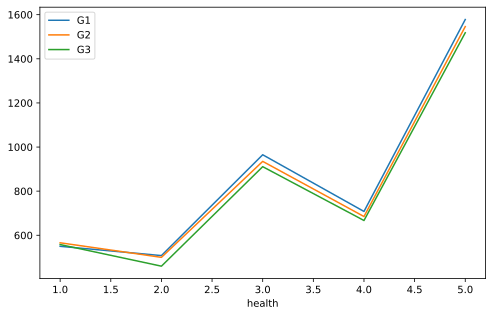

In [6]:
grade_data_frame = student_data_frame[['health'] + ['G1'] + ['G2'] + ['G3']]
grade_data_frame.groupby('health').sum().plot()

Зависимость между текущем состоянием здоровья и оценками студентов

<AxesSubplot:xlabel='health'>

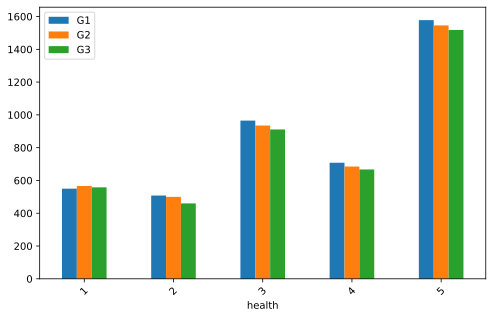

In [7]:
grade_data_frame.groupby('health').sum().plot(kind='bar', rot=45)

cols = ['studytime', 'G3', 'Medu', 'higher_yes']
sns_plot = sns.pairplot(student_df[cols])
#sns_plot.savefig('pairplot.png')

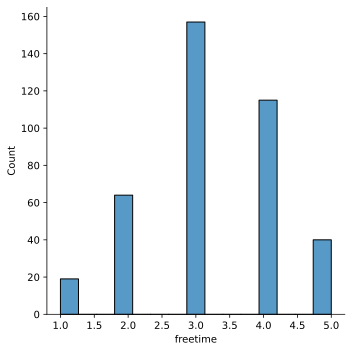

In [8]:
sns.displot(student_data_frame.freetime)

Число свободного времени по категориям (баллам)

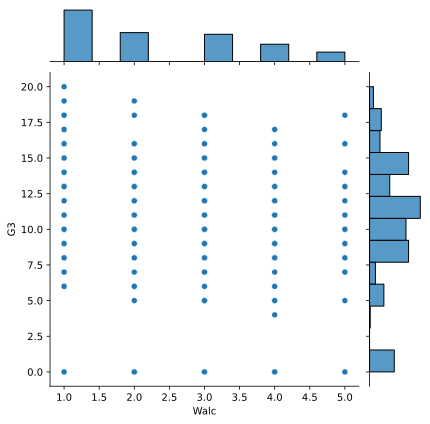

In [9]:
sns.jointplot(data=student_data_frame, y='G3', x='Walc')

Зависимость между финальной оценкой и потреблением алкоголя

<AxesSubplot:xlabel='Medu', ylabel='Fedu'>

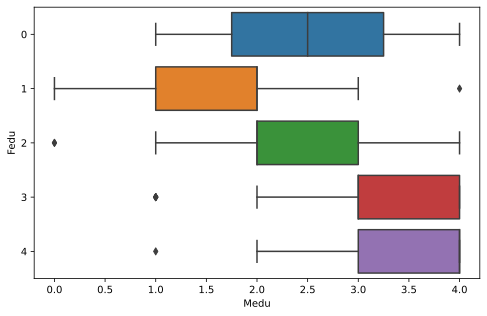

In [10]:
fedu_data = student_data_frame.Fedu.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Fedu", x="Medu", data=student_data_frame[student_data_frame.Fedu.isin(fedu_data)], orient="h")

Зависимость между образованием отца и образованием матери

In [11]:
student_data_frame

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


<AxesSubplot:xlabel='freetime', ylabel='age'>

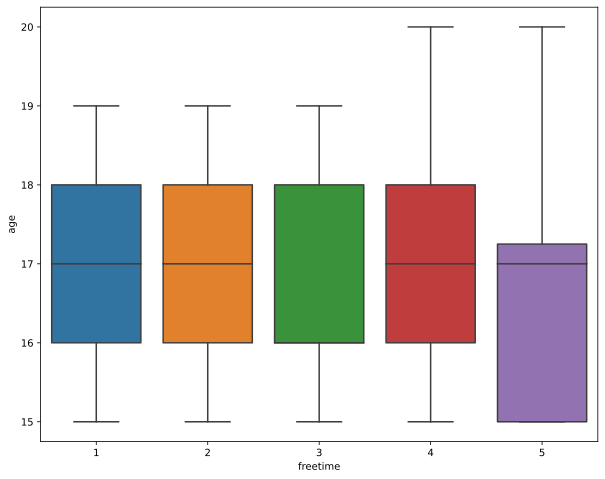

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=student_data_frame['freetime'],y=student_data_frame['age'],ax=ax, showfliers= False)

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(50, 50))
sns.heatmap(student_data_frame.corr(), square=True, annot=True)

<AxesSubplot:>

Зависимость между всеми параметрами датасета